In [2]:
import tensorflow_datasets as tfds


print(len(tfds.list_builders()))


195


In [3]:
print(tfds.list_builders()[:5])

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'ai2_arc', 'amazon_us_reviews']


In [4]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)

print(celeba_bldr.info.features['image'])

print(celeba_bldr.info.features['attributes'].keys())

print(celeba_bldr.info.citation)



FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [6]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)









Shuffling and writing examples to C:\Users\varka\tensorflow_datasets\mnist\3.0.1.incompleteJWNBPS\mnist-train.tfrecord
Shuffling and writing examples to C:\Users\varka\tensorflow_datasets\mnist\3.0.1.incompleteJWNBPS\mnist-test.tfrecord
Dataset mnist downloaded and prepared to C:\Users\varka\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [7]:
print(mnist_info)

print(mnist.keys())



tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

dict_keys(['test', 'train'])


(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


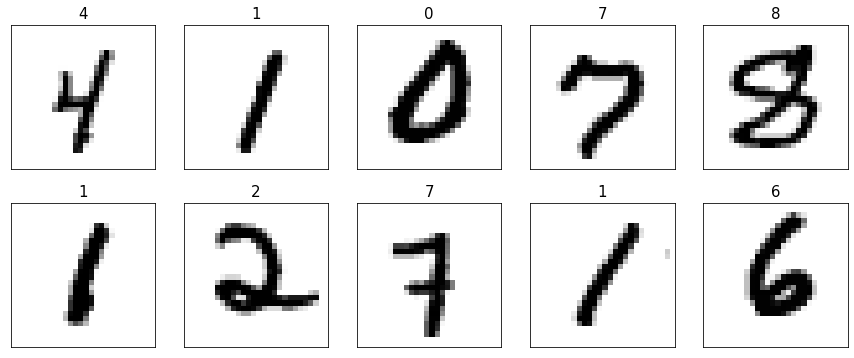

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item:
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)

plt.show()

